# Matplotlib Hist/Bar 图

<img src="https://matplotlib.org/_static/logo2_compressed.svg" width = "350" height = "200" alt="图片名称" align=center />

Matplotlib 提供了 `matplotlib.pyplot.bar` 和 `matplotlib.pyplot.hist` 两种方法来绘制**条形图**，也被称为：柱状图、Bar图、Hist图，条形图是数学统计分析中最常用的一种表达数据特征的形式；

但是两种函数提供的相关图形特征是不一样的，对于 `matplotlib.pyplot.hist` 可以通过`density` 参数的配置提供对于数据频率的计算，`matplotlib.pyplot.bar` 可以最直观地反映相关数据的特征；

<br>

**条形图**可以描述的**数据特征**是：

数据必须是二维的，可以进行数据相同维度的比较(比如：某餐馆的不同菜品的销售量，某数据中心的网络数据流量的不同协议类型的数量比较)，数据的单纯展示(比如：描述数据集中某项特征值的大小) ，可以很直观的了解数据的数量大小、变化趋势、分布差异性；

**缺点**：

+ 数据量较多时， 使用条形图来进行数据的展示容易造成混乱和不知道从哪看起的感觉；
+ 数据的量跨度较多时，使用柱状图难以很直观展示微小的数据，尤其是在数据跨度非常大(数据较为分散)的时候，不容易体现数据较小的数据；

<br>

举一个例子：

【TODO： 添加一个】


<br>



<br>

**在本教程，采用面向对象的编程方式来进行讲解，Matplotlib 的版本是： 3.4.2**

## 目录

* [1. Matplotlib.pyplot.hist 函数](#1.-Matplotlib.pyplot.hist-函数)


## 1. Matplotlib.pyplot.hist 函数

Matplotlib 提供了 [matplotlib.pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib-pyplot-hist) 来绘制**频率直方图**；

---

`matplotlib.pyplot.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)`

<br>

`Axes.hist(self, x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)[source]`

---

**用途**：

+ 绘制频率直方图，可以清楚地表示出相关的数据的分布频率(在什么区间值分布数量有多少)；

<br>

**属性**：

+ `x`: 可以是一个 `Numpy.array` 类型 或者 是一个 `list` 类型 的变量，该变量存储着相关的数据；

+ `bins`: 在 Matplotlib 当中，`bins` 用来给数据进行分区，默认的值为：`plt.rcParams["hist.bins] == 0`。该值可以被设置成为：`Integer` 整形变量，在被设置成为整形变量的时候，例如：`bins=10` 代表将 `x` **划分成为10个相同宽度的区间**；<br>该值也可以被声明为一个序列（List），这个序列代表区间的含义: `bins = [1,2,3,4]` 代表将该数值区间划分成为：$[1,2) [2,3), [3,4]$ 的区间，区间的默认形式是：左闭右开<br>`bins`也可以支持设定成为`string` 类型，该类型支持的选择变量：`'auto', 'fd', 'doane', 'scott', 'stone', 'rice', 'sturges', or 'sqrt'`；

+ `range`: Hist 直方图支持划分数据的相关范围，`range`参数控制显示数据的范围，默认的值为：`range == (x.min(),x.max())` ，是一个 二元组 类型的参数；从定义可以看出，参数生效的前提是 `x` 的类型为：`numpy.array`，因为只有`Numpy`可以迅速找到最大值、最小值；

+ `density`: 当该参数被设置成为 `True` 时，该柱状图变成频率直方图，每一个柱状的值代表：(density = counts / (sum(counts) * np.diff(bins)))；<br> 这样我们知道所有柱状图代表的面积(area)：(area = np.sum(density * np.diff(bins)) = 1)；

+ `weights`: 该参数定义了权重数组，数组的形状必须与 `x` 相同，即代表每一个值的权值，体现在频率直方图上；

+ 



In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# 当前的 Matplotlib 版本为：
print("正在使用的当前的 Matplotlib 版本为: %s " %mpl.__version__)

正在使用的当前的 Matplotlib 版本为: 3.4.2 


In [2]:
# 首先我们先来打印一下有关相关的默认配置
# 了解默认的配置可以了解当前的默认参数
for rc_key in mpl.rcParams.keys():
    if "hist" in rc_key:
        print("Hist 图的默认参数有: %s  mpl.rcParams[\"%s\"]==%s" %(rc_key, rc_key, mpl.rcParams[rc_key],))

# 尝试打印一下
mpl.rcParams["hist.bins"]

Hist 图的默认参数有: hist.bins  mpl.rcParams["hist.bins"]==10


10

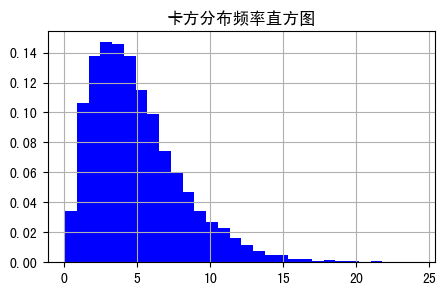

In [3]:
# 我们尝试使用 Numpy 进行绘图，因为 matplotlib.hist 函数对 numpy 的支持比较全面
# 在这里我们引用 卡方分布 的相关数据
plt.rcParams["font.sans-serif"] = "SimHei"

x_data = np.random.chisquare(df=(5.0,), size=(10000,))

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

ax.set_title("卡方分布频率直方图")
ax.grid(True)

ax.hist(x=x_data, bins=30, density=True, facecolor='b')

plt.show()

0.020833333333333332
0.020833333333333332
0.041666666666666664
0.020833333333333332
0.020833333333333332


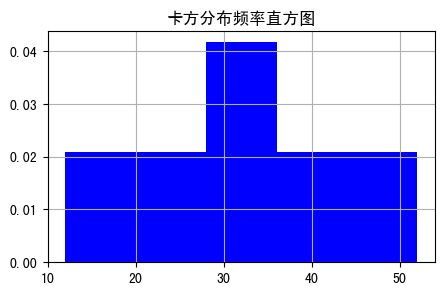

In [4]:
# 我们在这里使用代码理解一下 weights 这个参数
# 重新定义一组数值 - x_data

x_data = np.linspace(start=12,stop=52,num=5)
# 定义权重的相关数值
weights = [1,1,2,1,1]

fig = plt.figure(figsize=(5,3))
ax = fig.add_subplot(111)

ax.set_title("卡方分布频率直方图")
ax.grid(True)
ax.set_xticks([10,20,30,40,50])

x, bins, patches = ax.hist(x=x_data, bins=5, density=True, weights=weights, facecolor='b')

for p in patches:
    print(p.get_height())

plt.show()